# MINI PROJET ML

# I-Business Understanding

# II-Data Understanding

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [167]:
data_path = "data/datadelevry.csv"

In [168]:
df = pd.read_csv(data_path)

In [169]:
df.shape

(172941, 14)

In [170]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,NaN,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,3900.0,3.0,NaN,1600.0,6.0,6.0,9.0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172941 entries, 0 to 172940
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 168654 non-null  float64
 1   created_at                169541 non-null  object 
 2   actual_delivery_time      169474 non-null  object 
 3   store_id                  169489 non-null  object 
 4   store_primary_category    165369 non-null  object 
 5   order_protocol            168631 non-null  float64
 6   total_items               169453 non-null  float64
 7   subtotal                  169660 non-null  float64
 8   num_distinct_items        169489 non-null  float64
 9   min_item_price            169472 non-null  float64
 10  max_item_price            169521 non-null  float64
 11  total_onshift_partners    155613 non-null  float64
 12  total_busy_partners       155590 non-null  float64
 13  total_outstanding_orders  155624 non-null  f

In [172]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
market_id,168654.0,NaN,NaN,NaN,2.982414,1.525751,1.0,2.0,3.0,4.0,6.0
created_at,169541,157206,2015-01-24 01:56:33,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actual_delivery_time,169474,154909,2015-02-05 03:10:31,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,169489,5930,d43ab110ab2489d6b9b2caa394bf920f,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_primary_category,165369,73,american,16736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_protocol,168631.0,NaN,NaN,NaN,2.850437,1.487752,1.0,1.0,3.0,4.0,7.0
total_items,169453.0,NaN,NaN,NaN,3.201543,2.674022,1.0,2.0,3.0,4.0,411.0
subtotal,169660.0,NaN,NaN,NaN,2684.534174,1824.565715,0.0,1400.0,2200.0,3397.0,27100.0
num_distinct_items,169489.0,NaN,NaN,NaN,2.678699,1.634766,1.0,1.0,2.0,3.0,20.0
min_item_price,169472.0,NaN,NaN,NaN,684.503009,520.492937,-86.0,299.0,595.0,945.0,14700.0


In [173]:
df.isnull().sum()

market_id                    4287
created_at                   3400
actual_delivery_time         3467
store_id                     3452
store_primary_category       7572
order_protocol               4310
total_items                  3488
subtotal                     3281
num_distinct_items           3452
min_item_price               3469
max_item_price               3420
total_onshift_partners      17328
total_busy_partners         17351
total_outstanding_orders    17317
dtype: int64

In [174]:
# parse datetimes - adapt names if slightly different
for col in ['created_at', 'actual_delivery_time']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [175]:
#create target
df['duree'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60.0

In [176]:
# about the target
print("nulls in target:", df['duree'].isna().sum())
print("negatives:", (df['duree'] < 0).sum())
display(df['duree'].describe())

nulls in target: 6797
negatives: 0


count    166144.000000
mean         48.653734
std         348.927631
min           1.683333
25%          35.150000
50%          44.416667
75%          56.433333
max      141947.650000
Name: duree, dtype: float64

In [177]:
# missing values in % 
missing = df.isnull().sum().to_frame('missing_count')
missing['missing_pct'] = 100 * missing['missing_count'] / len(df)
missing = missing.sort_values('missing_pct', ascending=False)
display(missing.head(30))
# duplicated rows
print("duplicate rows:", df.duplicated().sum())

,missing_count,missing_pct
total_busy_partners,17351,10.032901
total_onshift_partners,17328,10.019602
total_outstanding_orders,17317,10.013242
store_primary_category,7572,4.378372
duree,6797,3.930242
order_protocol,4310,2.492179
market_id,4287,2.478880
total_items,3488,2.016873
min_item_price,3469,2.005886
actual_delivery_time,3467,2.004730


duplicate rows: 105


In [178]:
# group by day (ignore hours/minutes)
df['order_date'] = df['created_at'].dt.date 
daily_stats = df.groupby('order_date').agg(
    order_count=('created_at', 'count'),
    avg_delivery=('duree', 'mean')
).reset_index()

daily_stats.head()


# by this we see that we only have 5 dates in this dataset

,order_date,order_count,avg_delivery
0,2014-10-19,1,141947.650000
1,2015-01-21,1757,42.763380
2,2015-01-22,5131,44.329025
3,2015-01-23,5696,44.604165
4,2015-01-24,7064,49.751902


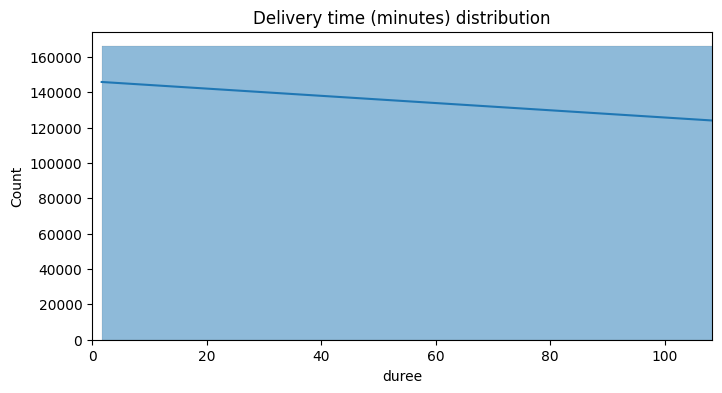

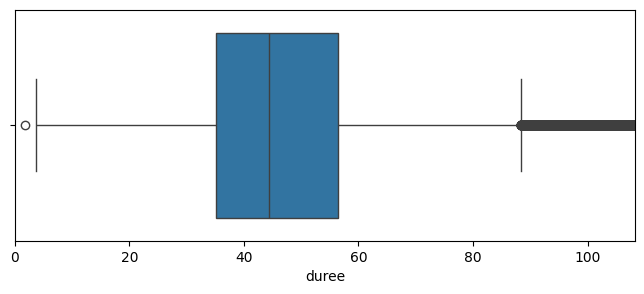

In [179]:
plt.figure(figsize=(8,4))
sns.histplot(df['duree'].dropna(), kde=True)
plt.title("Delivery time (minutes) distribution")
plt.xlim(0, df['duree'].quantile(0.99))  # clip to 99th pct for visibility
plt.show()

plt.figure(figsize=(8,3))
sns.boxplot(x=df['duree'].dropna())
plt.xlim(0, df['duree'].quantile(0.99))
plt.show()

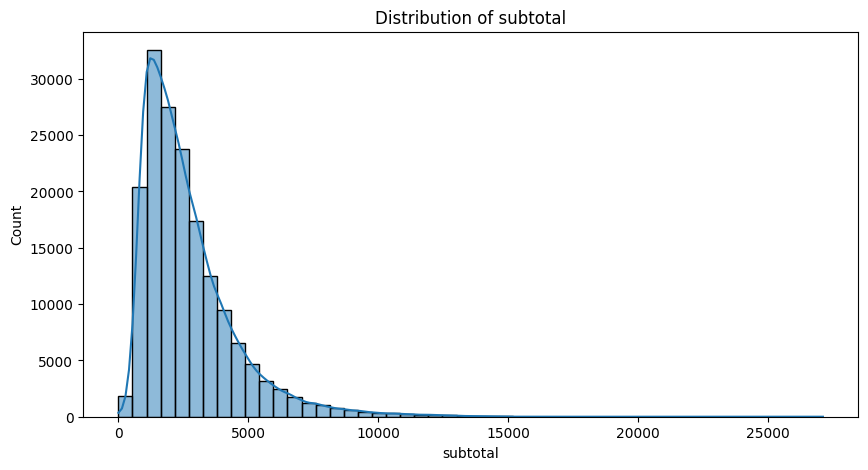

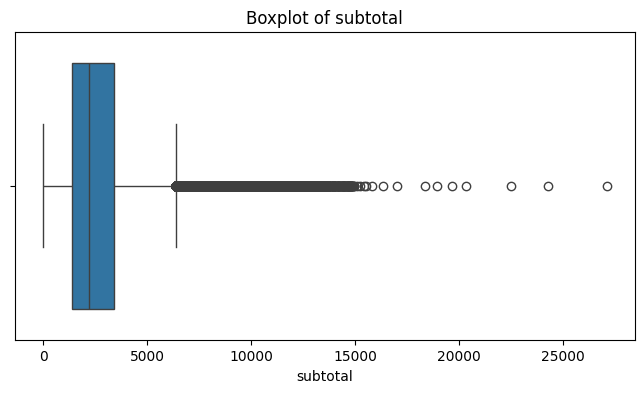

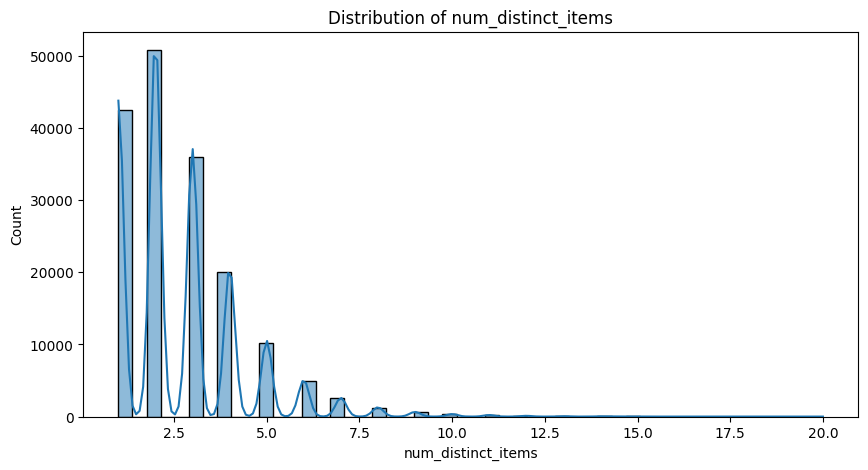

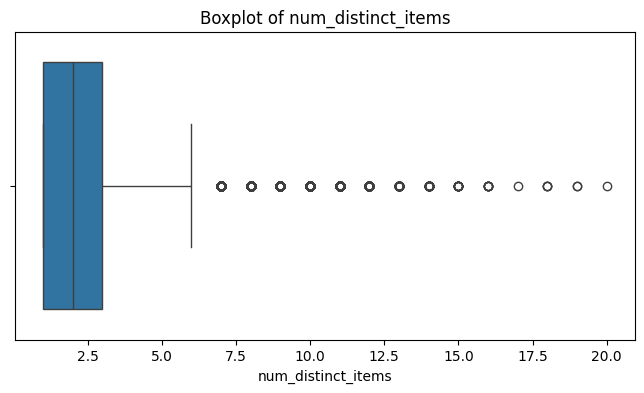

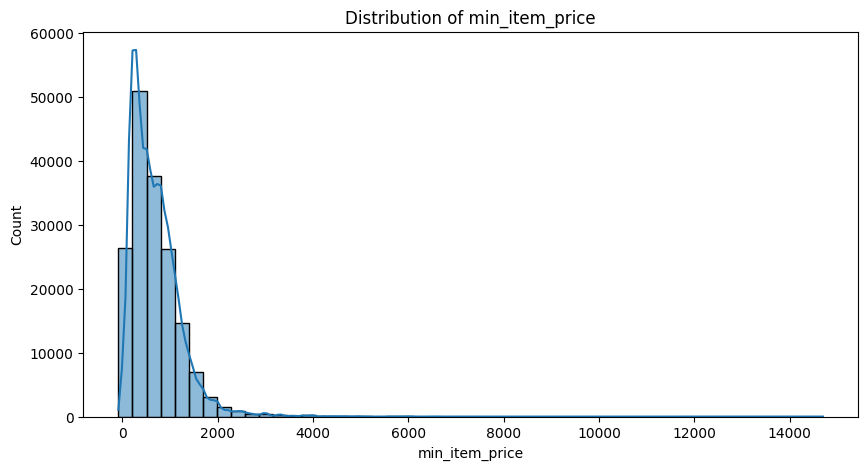

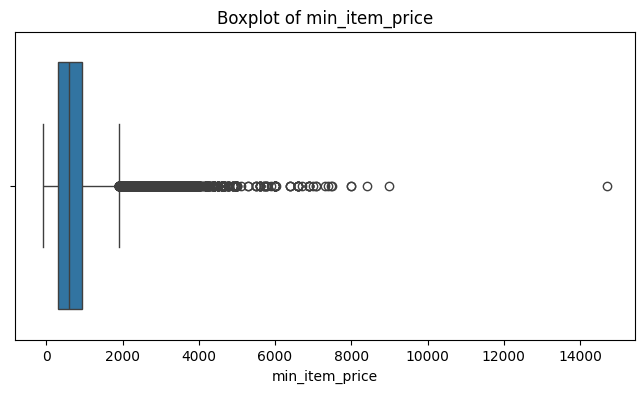

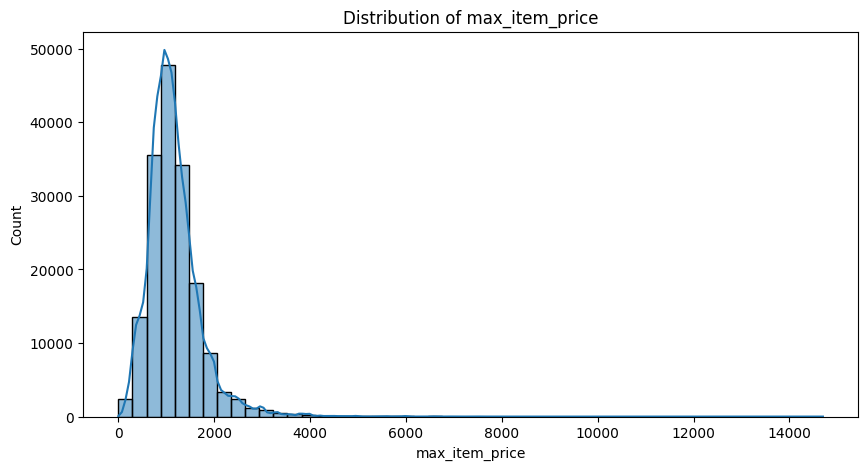

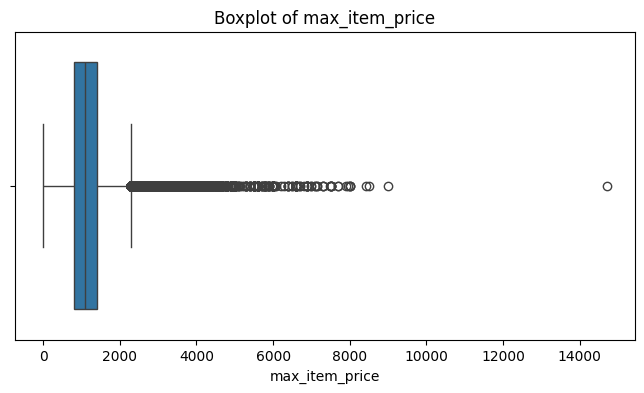

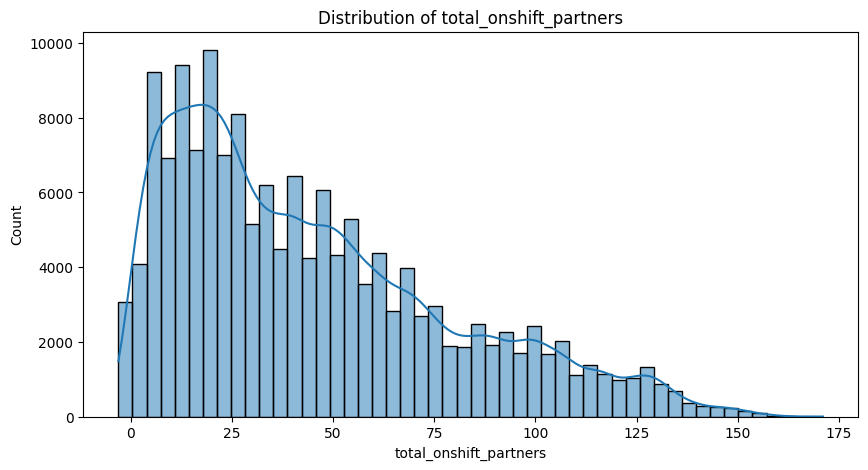

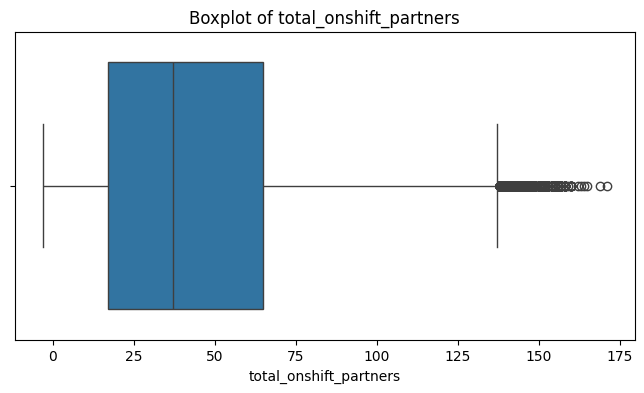

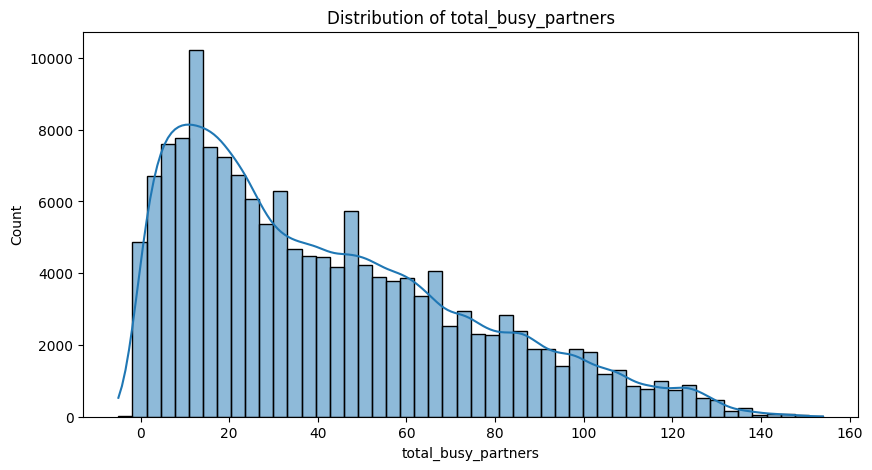

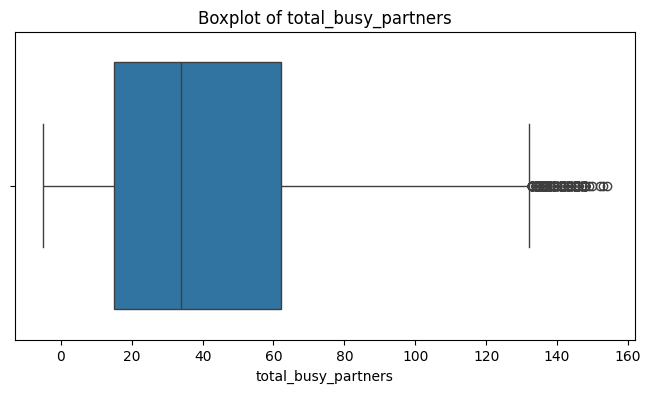

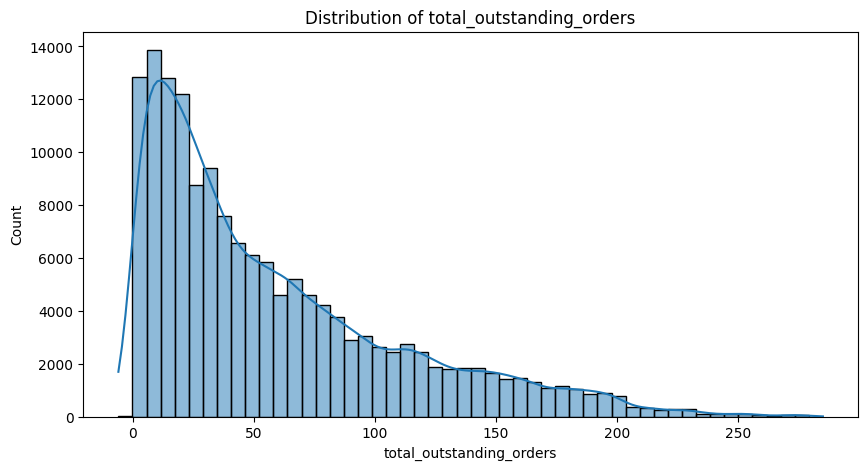

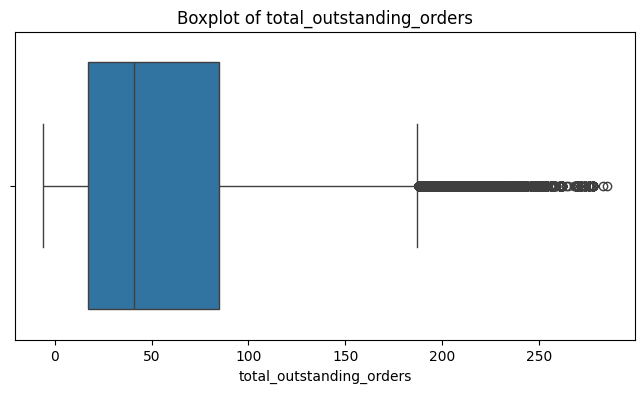

In [180]:
# checking the distribution and outliers 
numeric_cols = [ 'subtotal', 'num_distinct_items', 
                'min_item_price', 'max_item_price', 'total_onshift_partners', 
                'total_busy_partners', 'total_outstanding_orders']

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

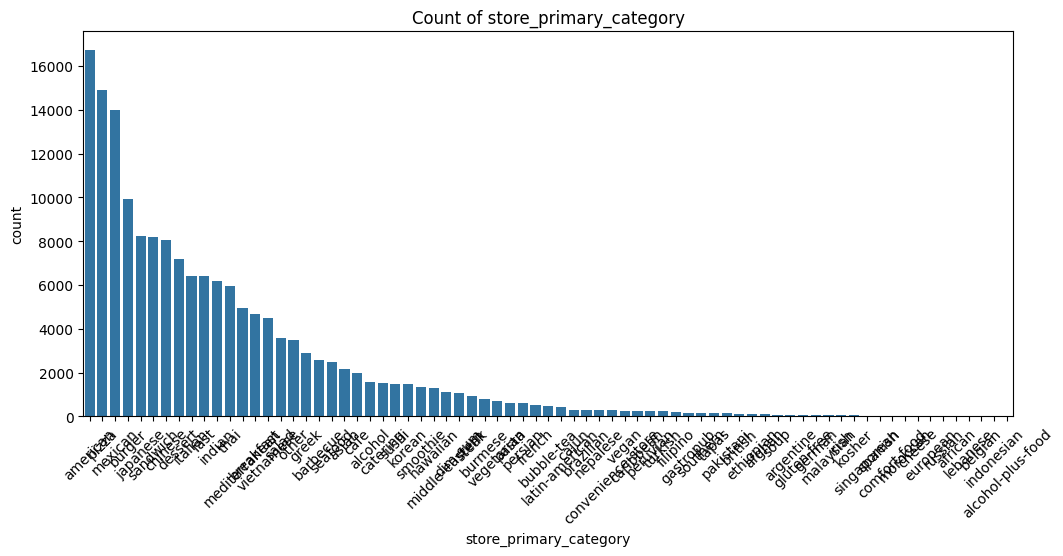

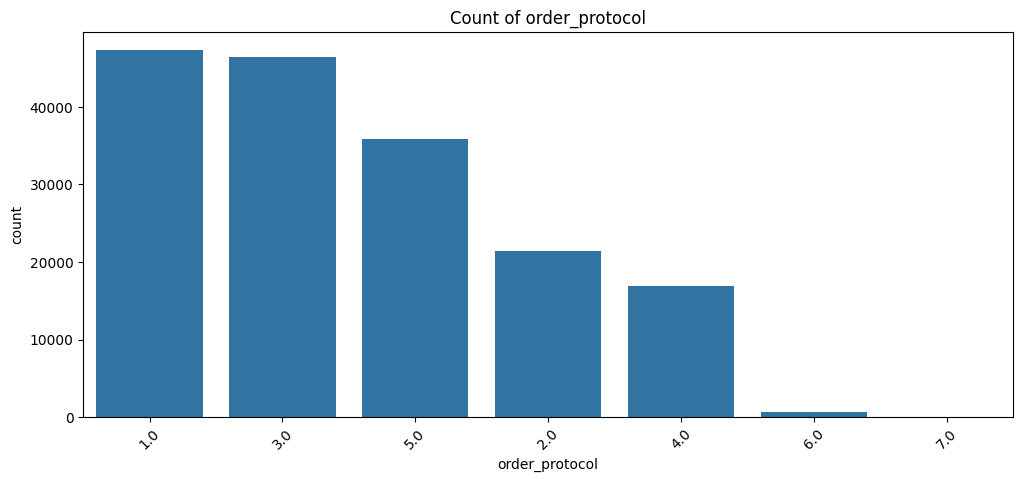

In [181]:
categorical_cols = ['store_primary_category', 'order_protocol']

for col in categorical_cols:
    plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [182]:
# splitting the features for more clarity and detailed observation 
df['order_hour'] = df['created_at'].dt.hour
df['order_dow'] = df['created_at'].dt.dayofweek   # 0=Mon
df['order_month'] = df['created_at'].dt.month
df['is_weekend'] = df['order_dow'].isin([5,6]).astype(int)
df['is_peak_lunch'] = df['order_hour'].between(11,14).astype(int)
df['is_peak_dinner'] = df['order_hour'].between(19,22).astype(int)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172941 entries, 0 to 172940
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 168654 non-null  float64       
 1   created_at                169541 non-null  datetime64[ns]
 2   actual_delivery_time      169474 non-null  datetime64[ns]
 3   store_id                  169489 non-null  object        
 4   store_primary_category    165369 non-null  object        
 5   order_protocol            168631 non-null  float64       
 6   total_items               169453 non-null  float64       
 7   subtotal                  169660 non-null  float64       
 8   num_distinct_items        169489 non-null  float64       
 9   min_item_price            169472 non-null  float64       
 10  max_item_price            169521 non-null  float64       
 11  total_onshift_partners    155613 non-null  float64       
 12  to

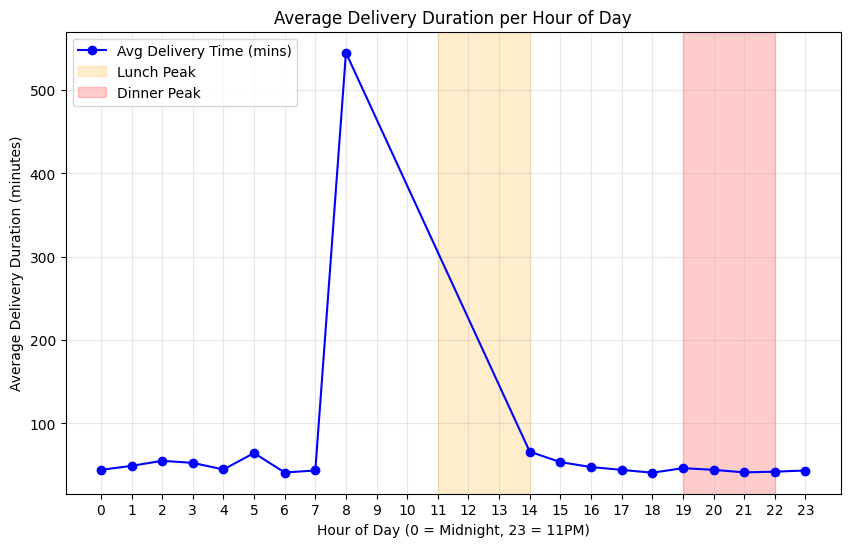

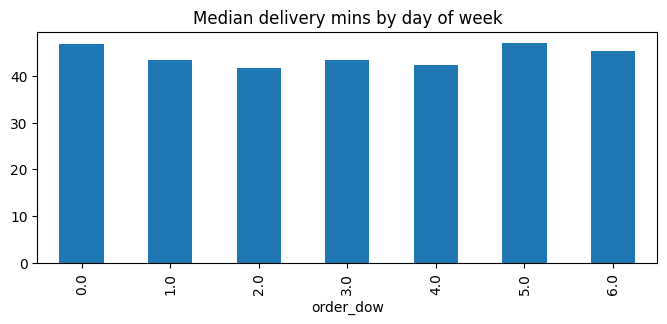

In [184]:
# Average delivery duration per hour
avg_delivery_per_hour = df.groupby('order_hour')['duree'].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_delivery_per_hour.index, avg_delivery_per_hour.values, 
         marker='o', linestyle='-', color="blue", label="Avg Delivery Time (mins)")

# Highlight lunch peak (11–14)
plt.axvspan(11, 14, color="orange", alpha=0.2, label="Lunch Peak")

# Highlight dinner peak (19–22)
plt.axvspan(19, 22, color="red", alpha=0.2, label="Dinner Peak")

plt.title("Average Delivery Duration per Hour of Day")
plt.xlabel("Hour of Day (0 = Midnight, 23 = 11PM)")
plt.ylabel("Average Delivery Duration (minutes)")
plt.xticks(range(0,24))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
plt.figure(figsize=(8,3))
df.groupby('order_dow')['duree'].median().plot(kind='bar')
plt.title("Median delivery mins by day of week")
plt.show()

C:\Users\jmaae\AppData\Local\Temp\ipykernel_12376\2627739702.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='duree', estimator='mean', ci=None)


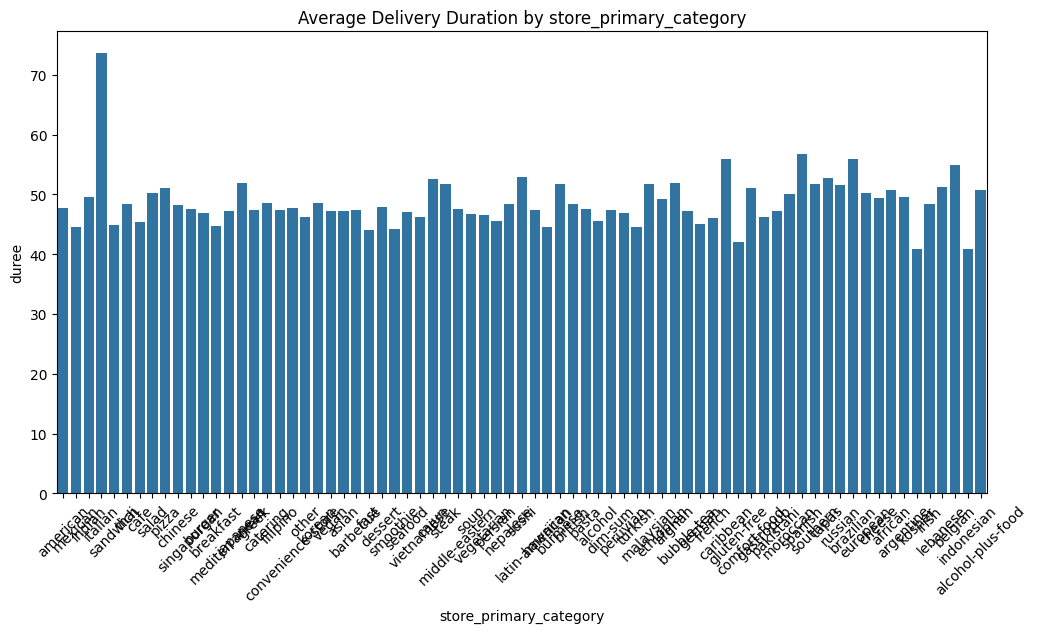

C:\Users\jmaae\AppData\Local\Temp\ipykernel_12376\2627739702.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='duree', estimator='mean', ci=None)


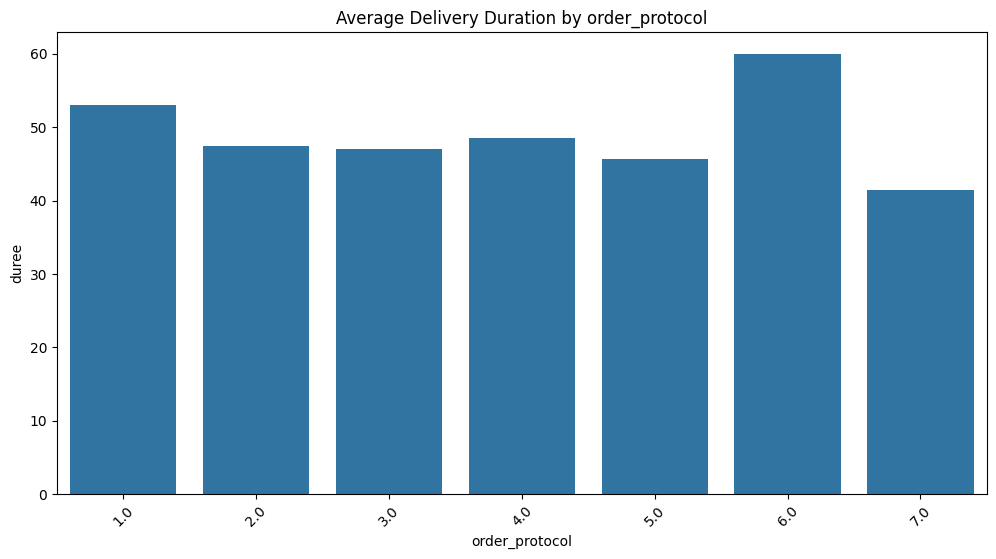

In [185]:
# we checked how the category of the restaurant and the order protocol affects the duration
for col in categorical_cols:
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x=col, y='duree', estimator='mean', ci=None)
    plt.title(f'Average Delivery Duration by {col}')
    plt.xticks(rotation=45)
    plt.show()

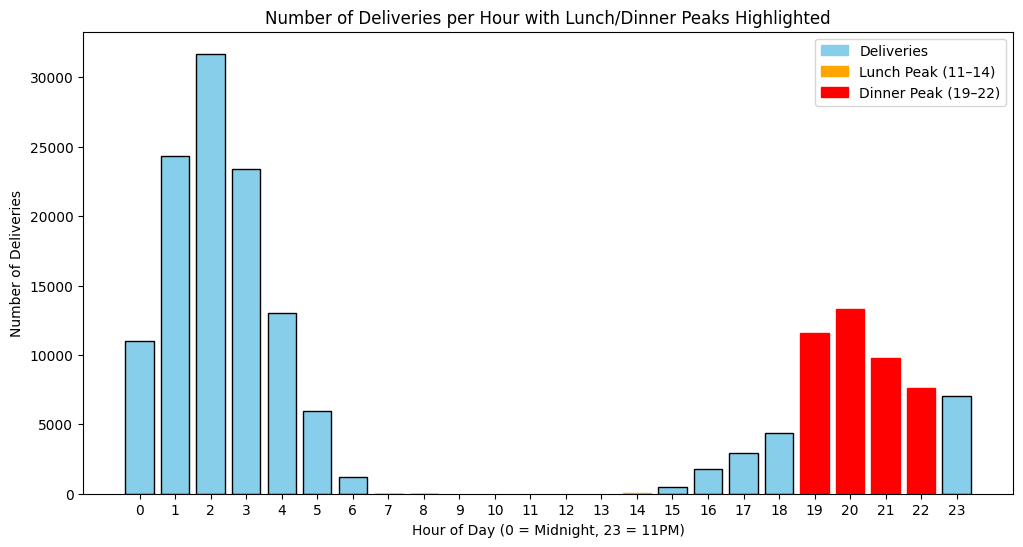

In [186]:
# we checked the number of deliveries per hour of the day:

import matplotlib.patches as mpatches

# Count deliveries per hour
orders_per_hour = df['order_hour'].value_counts().sort_index()

plt.figure(figsize=(12,6))
bars = plt.bar(orders_per_hour.index, orders_per_hour.values, 
               color="skyblue", edgecolor="black")

# Highlight lunch peak hours (11–14) in orange
for hour in range(11, 15):
    if hour in orders_per_hour.index:
        idx = orders_per_hour.index.get_loc(hour)
        bars[idx].set_color("orange")

# Highlight dinner peak hours (19–22) in red
for hour in range(19, 23):
    if hour in orders_per_hour.index:
        idx = orders_per_hour.index.get_loc(hour)
        bars[idx].set_color("red")

# Custom legend patches
all_patch = mpatches.Patch(color="skyblue", label="Deliveries")
lunch_patch = mpatches.Patch(color="orange", label="Lunch Peak (11–14)")
dinner_patch = mpatches.Patch(color="red", label="Dinner Peak (19–22)")

plt.title("Number of Deliveries per Hour with Lunch/Dinner Peaks Highlighted")
plt.xlabel("Hour of Day (0 = Midnight, 23 = 11PM)")
plt.ylabel("Number of Deliveries")
plt.xticks(range(0,24))
plt.legend(handles=[all_patch, lunch_patch, dinner_patch])
plt.show()



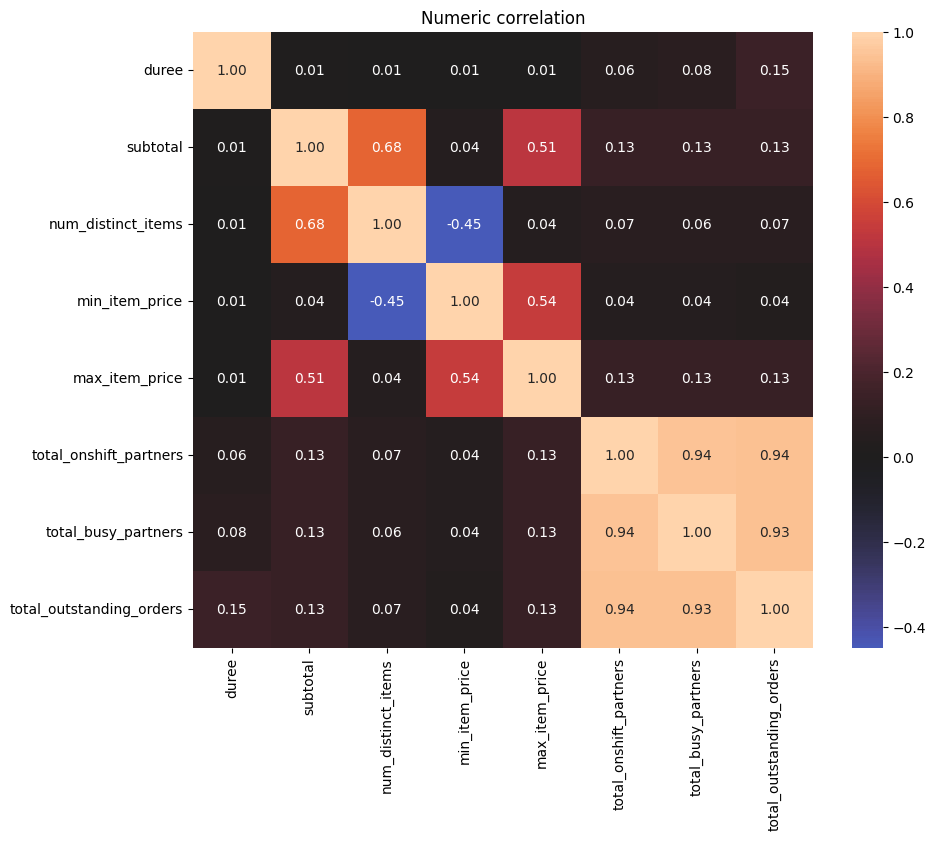

In [187]:
#correlation
num_cols = ['duree','subtotal','num_distinct_items','min_item_price','max_item_price',
            'total_onshift_partners','total_busy_partners','total_outstanding_orders',
            'outstanding_per_partner']
num_cols = [c for c in num_cols if c in df.columns]

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", center=0)
plt.title("Numeric correlation")
plt.show()


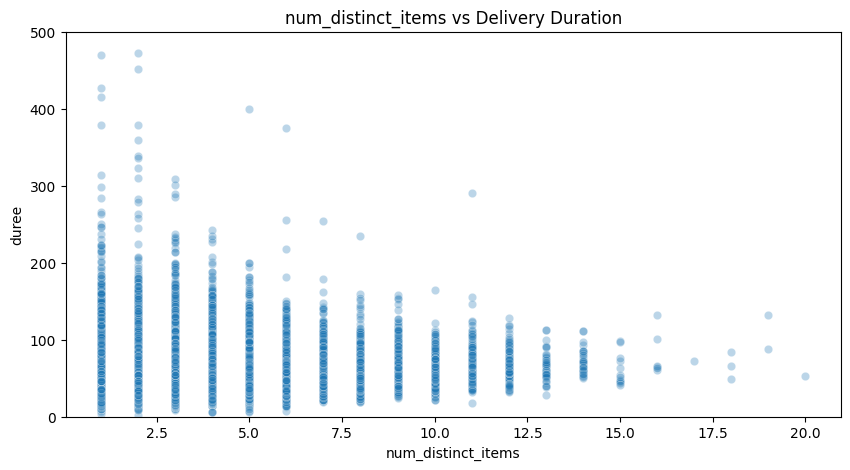

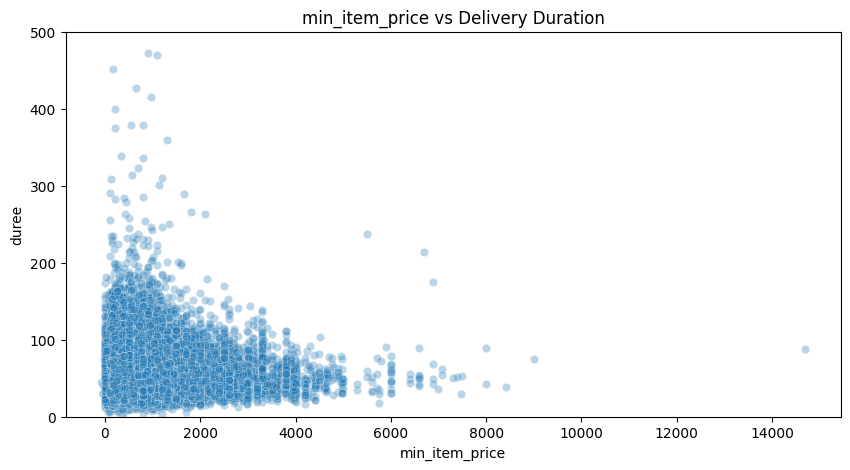

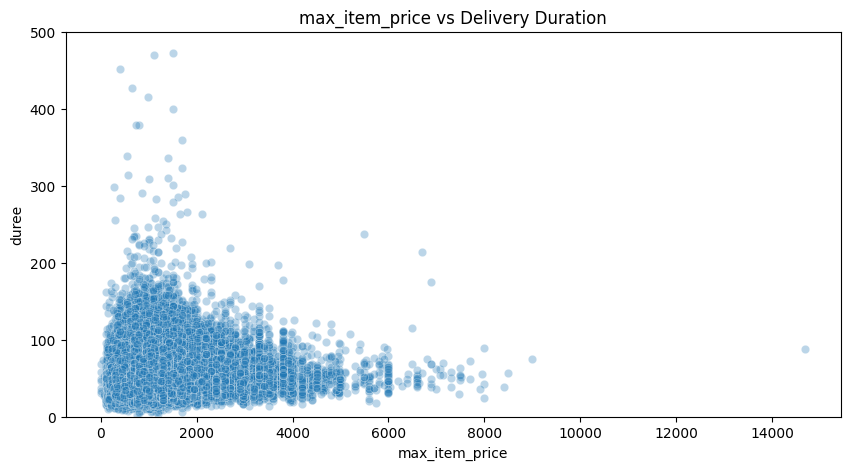

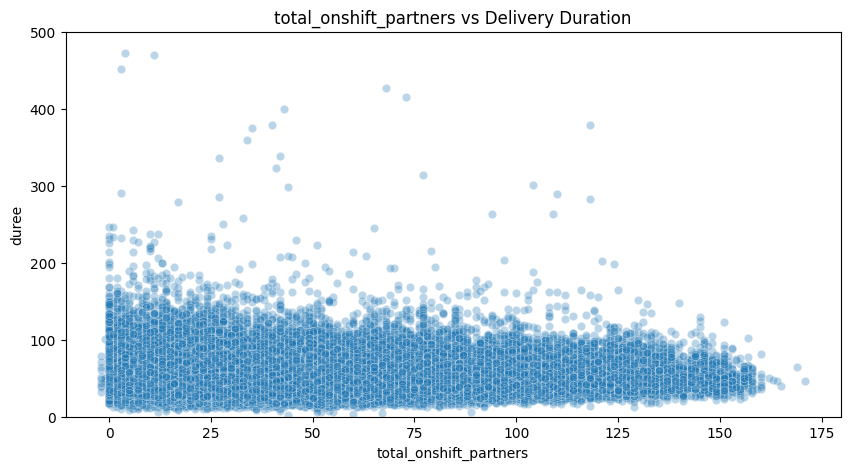

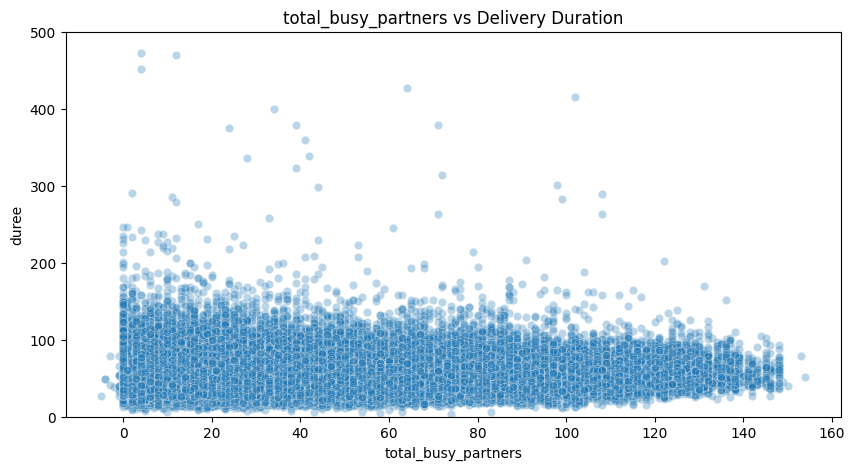

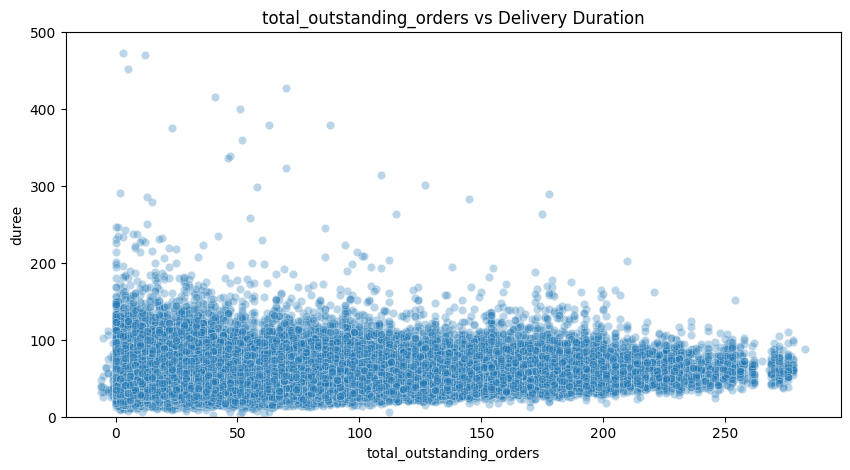

In [188]:
#Scatterplots to see the relationship between the features and the target
for col in numeric_cols[1:]:  
    plt.figure(figsize=(10,5))
   
    sns.scatterplot(x=df[col], y=df["duree"], alpha=0.3)
    plt.ylim(0, 500)   # force y-axis between 0 and 500

    plt.title(f'{col} vs Delivery Duration')
    plt.show()

# III-Data Preparation

In [189]:
# missing values
num_cols = [
    'market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
    'max_item_price', 'total_onshift_partners', 'total_busy_partners',
    'total_outstanding_orders', 'duree','order_hour','order_month','order_dow'
]
num_cols = [col for col in num_cols if col in df.columns]

for col in num_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f" Filled missing values in **{col}** with median = {median_val}")

cat_cols = ['store_primary_category', 'order_protocol']
cat_cols = [col for col in cat_cols if col in df.columns]

for col in cat_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f" Filled missing values in **{col}** with mode = {mode_val}")


cols_to_drop = ["created_at", "actual_delivery_time", "store_id", "delivery_duration"]
dropped = [c for c in cols_to_drop if c in df.columns]
df.drop(columns=dropped, inplace=True)
if dropped:
    print(f" Dropped unnecessary columns: {dropped}")

cols_to_check = [c for c in ['created_at', 'actual_delivery_time'] if c in df.columns]
if cols_to_check:
    df.dropna(subset=cols_to_check, inplace=True)
    print(f" Dropped rows with missing values in {cols_to_check}")

if 'store_id' in df.columns:
    df.dropna(subset=['store_id'], inplace=True)
    print("Dropped rows with missing values in **store_id**")

print("Missing values after cleaning:\n" ,df.isnull().sum())







 Filled missing values in **market_id** with median = 3.0
 Filled missing values in **total_items** with median = 3.0
 Filled missing values in **subtotal** with median = 2200.0
 Filled missing values in **num_distinct_items** with median = 2.0
 Filled missing values in **min_item_price** with median = 595.0
 Filled missing values in **max_item_price** with median = 1095.0
 Filled missing values in **total_onshift_partners** with median = 37.0
 Filled missing values in **total_busy_partners** with median = 34.0
 Filled missing values in **total_outstanding_orders** with median = 41.0
 Filled missing values in **duree** with median = 44.416666666666664
 Filled missing values in **order_hour** with median = 3.0
 Filled missing values in **order_month** with median = 2.0
 Filled missing values in **order_dow** with median = 3.0
 Filled missing values in **store_primary_category** with mode = american
 Filled missing values in **order_protocol** with mode = 1.0
 Dropped unnecessary columns

C:\Users\jmaae\AppData\Local\Temp\ipykernel_12376\2866615349.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\jmaae\AppData\Local\Temp\ipykernel_12376\2866615349.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [190]:
#outliers

for col in ["min_item_price", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]:
    if col in df.columns:
        median_val = df[col].median()
        df.loc[df[col] < 0, col] = median_val
        print(f"Replaced negative values in **{col}** with median = {median_val}")

print("\nStats after handling outliers:")
print(df[[c for c in ["min_item_price", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders"] if c in df.columns]].describe().to_markdown())



Replaced negative values in **min_item_price** with median = 595.0
Replaced negative values in **total_onshift_partners** with median = 37.0
Replaced negative values in **total_busy_partners** with median = 34.0
Replaced negative values in **total_outstanding_orders** with median = 41.0

Stats after handling outliers:
|       |   min_item_price |   total_onshift_partners |   total_busy_partners |   total_outstanding_orders |
|:------|-----------------:|-------------------------:|----------------------:|---------------------------:|
| count |       172941     |              172941      |           172941      |                172941      |
| mean  |          682.747 |                  44.0339 |               41.0298 |                    56.3883 |
| std   |          515.368 |                  32.8412 |               30.6168 |                    50.2746 |
| min   |            0     |                   0      |                0      |                     0      |
| 25%   |          300    

In [191]:
#feature engineering :

#adding a ratio(busy/onshift):
if "total_onshift_partners" in df.columns and "total_busy_partners" in df.columns:
    df["busy_to_onshift_ratio"] = df["total_busy_partners"] / (df["total_onshift_partners"] + 1e-6)
    print("Created feature **busy_to_onshift_ratio**")

#encoding the story_category column :
if "store_primary_category" in df.columns:
    df = pd.get_dummies(df, columns=["store_primary_category"], prefix="store_cat")
    print(" Encoded **store_primary_category** with one-hot encoding")




Created feature **busy_to_onshift_ratio**
 Encoded **store_primary_category** with one-hot encoding


In [192]:
print(df["duree"])

0         62.983333
1         67.066667
2         29.683333
3         51.250000
4         39.833333
            ...    
172936    35.300000
172937    46.633333
172938    33.333333
172939    28.400000
172940    63.666667
Name: duree, Length: 172941, dtype: float64


# IV-Modeling

In [193]:
print(df["duree"])

0         62.983333
1         67.066667
2         29.683333
3         51.250000
4         39.833333
            ...    
172936    35.300000
172937    46.633333
172938    33.333333
172939    28.400000
172940    63.666667
Name: duree, Length: 172941, dtype: float64


In [194]:
# the split
from sklearn.model_selection import train_test_split 
df = df.drop(columns=["order_date"])
X = df.drop(columns=["duree"])
y = df["duree"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print(f" X_train shape: {X_train.shape}")
print(f" X_test shape : {X_test.shape}")
print(f" y_train shape: {y_train.shape}")
print(f" y_test shape : {y_test.shape}")

 X_train shape: (138352, 90)
 X_test shape : (34589, 90)
 y_train shape: (138352,)
 y_test shape : (34589,)


### supervised

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

# init
models = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
}

# train
for name, model in models.items():
    print(f"\n Entraînement du modèle: {name}...")
    model.fit(X_train, y_train)   # y_train est continu
    joblib.dump(model, f"{name}.joblib")
    print(f" Modèle {name} entraîné et sauvegardé.")

print("\n Tous les modèles de régression ont été entraînés et sauvegardés.")


 Entraînement du modèle: LinearRegression...
 Modèle LinearRegression entraîné et sauvegardé.

 Entraînement du modèle: RandomForestRegressor...
 Modèle RandomForestRegressor entraîné et sauvegardé.

 Entraînement du modèle: GradientBoostingRegressor...
 Modèle GradientBoostingRegressor entraîné et sauvegardé.

 Tous les modèles de régression ont été entraînés et sauvegardés.


### unsupervised

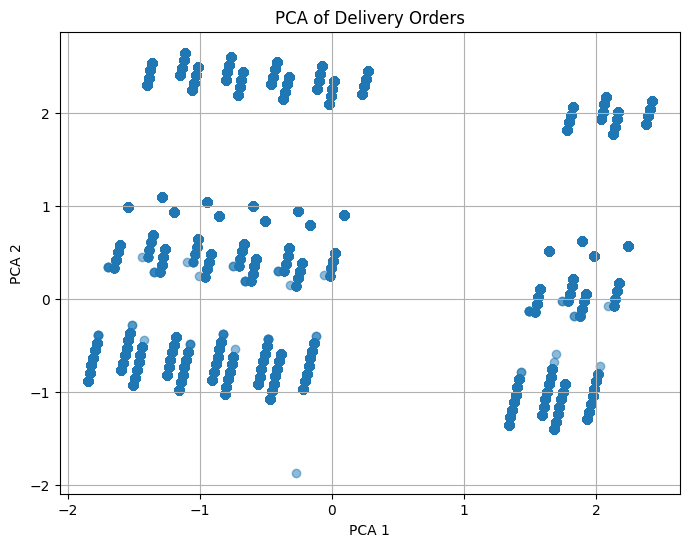

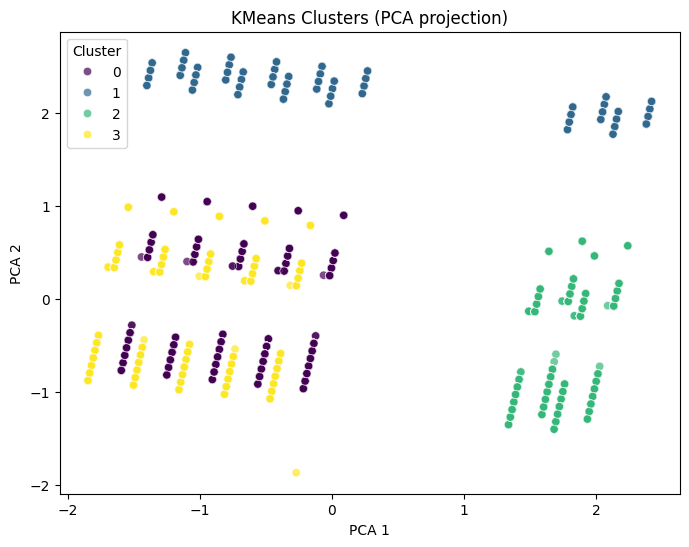

Cluster summary:
          order_hour  order_dow  order_month  is_weekend  is_peak_lunch  \
cluster                                                                  
0          4.689204   2.526528     1.000000    0.000000       0.000296   
1         20.317769   3.160387     1.631112    0.319236       0.000000   
2          4.894645   5.488410     1.639038    1.000000       0.000244   
3          4.038783   1.824744     2.000137    0.000017       0.000222   

         is_peak_dinner  
cluster                  
0                   0.0  
1                   1.0  
2                   0.0  
3                   0.0  
Cluster 0: Mostly lunch orders on weekdays, morning hours 
 Cluster 1: Evening orders, likely dinner peak 
 Cluster 2: Weekend orders, high activity hours
 Cluster 3: Off-peak hours, low volume


In [ ]:
#clustering ( by hours)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose your dataframe is df and the features you created are:
features = ["order_hour", "order_dow", "order_month", 
            "is_weekend", "is_peak_lunch", "is_peak_dinner"]

X = df[features]

#  Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA circle (2D scatter)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA of Delivery Orders")
plt.grid(True)
plt.show()

# Apply KMeans
k = 4  # you can tune this with Elbow or Silhouette
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['cluster'] = clusters

# Visualize clusters in PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.title("KMeans Clusters (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

# Describe clusters
cluster_summary = df.groupby('cluster')[features].mean()
print("Cluster summary:\n", cluster_summary)
print("Cluster 0: Mostly lunch orders on weekdays, morning hours \n Cluster 1: Evening orders, likely dinner peak \n Cluster 2: Weekend orders, high activity hours\n Cluster 3: Off-peak hours, low volume")

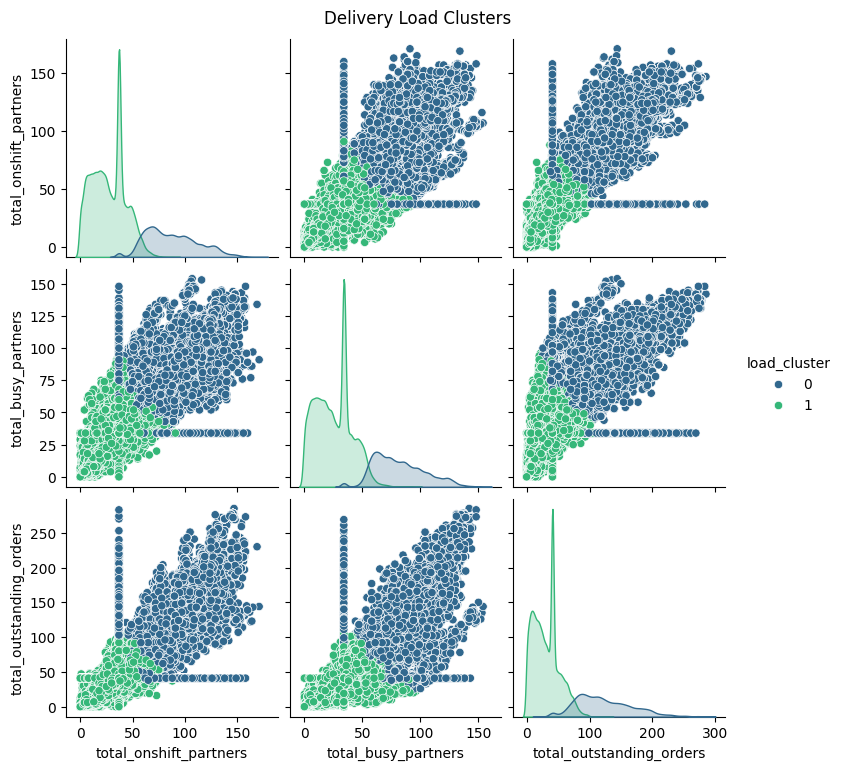

Cluster summary:
               total_onshift_partners  total_busy_partners  \
load_cluster                                                
0                          87.430870            81.499813   
1                          27.307765            25.431687   

              total_outstanding_orders  
load_cluster                            
0                           122.508127  
1                            30.904237  


In [204]:
#clustering by delivery partners / outstanding orders
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Features for load clustering
features = ["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]
X = df[features]

# 1️⃣ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2️⃣ Apply KMeans (2 clusters: low load vs high load)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['load_cluster'] = labels

# 3️⃣ Visualize clusters (pairplot)
sns.pairplot(df, vars=features, hue='load_cluster', palette='viridis', diag_kind='kde')
plt.suptitle("Delivery Load Clusters", y=1.02)
plt.show()

# 4️⃣ Inspect cluster statistics
cluster_summary = df.groupby('load_cluster')[features].mean()
print("Cluster summary:\n", cluster_summary)
print("Cluster 0: Many partners free, few outstanding orders → low load\n Cluster 1: Most partners busy, many outstanding orders → high load")


# V-Evaluation

In [ ]:

import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

 # transforme en Series

# Liste des modèles de régression à évaluer
model_names = ["RandomForestRegressor", "GradientBoostingRegressor"]

results = {}

print("\n🚀 Début de l'évaluation des modèles de régression...\n")

for name in model_names:
    print(f"➡️ Évaluation du modèle: {name}")
    model = joblib.load(f"{name}.joblib")
    
    # Prédictions
    y_pred = model.predict(X_test)

    # Métriques de régression
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Sauvegarder les résultats dans un dictionnaire
    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

    # Afficher un résumé clair
    print(f"   ✅ MSE : {mse:.4f}")
    print(f"   ✅ RMSE: {rmse:.4f}")
    print(f"   ✅ MAE : {mae:.4f}")
    print(f"   ✅ R2  : {r2:.4f}\n")

# Sauvegarder les résultats détaillés dans un fichier JSON
with open("model_evaluation_results.json", "w") as f:
    json.dump(results, f, indent=4)

print("📁 Résultats de l'évaluation sauvegardés dans model_evaluation_results.json")

# Comparaison des modèles sous forme de tableau
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'MSE': [res['MSE'] for res in results.values()],
    'RMSE': [res['RMSE'] for res in results.values()],
    'MAE': [res['MAE'] for res in results.values()],
    'R2': [res['R2'] for res in results.values()]
})

print("\n📊 ### Comparaison des modèles :\n")
print(comparison_df.sort_values(by='R2', ascending=False).to_markdown(index=False))



🚀 Début de l'évaluation des modèles de régression...

➡️ Évaluation du modèle: LinearRegression
   ✅ MSE : 704.6106
   ✅ RMSE: 26.5445
   ✅ MAE : 21.5335
   ✅ R2  : -0.9634

➡️ Évaluation du modèle: RandomForestRegressor
   ✅ MSE : 289.3355
   ✅ RMSE: 17.0099
   ✅ MAE : 11.4312
   ✅ R2  : 0.1938

➡️ Évaluation du modèle: GradientBoostingRegressor
   ✅ MSE : 295.9807
   ✅ RMSE: 17.2041
   ✅ MAE : 11.7542
   ✅ R2  : 0.1752

📁 Résultats de l'évaluation sauvegardés dans model_evaluation_results.json

📊 ### Comparaison des modèles :

| Model                     |     MSE |    RMSE |     MAE |        R2 |
|:--------------------------|--------:|--------:|--------:|----------:|
| RandomForestRegressor     | 289.336 | 17.0099 | 11.4312 |  0.193762 |
| GradientBoostingRegressor | 295.981 | 17.2041 | 11.7542 |  0.175245 |
| LinearRegression          | 704.611 | 26.5445 | 21.5335 | -0.96341  |


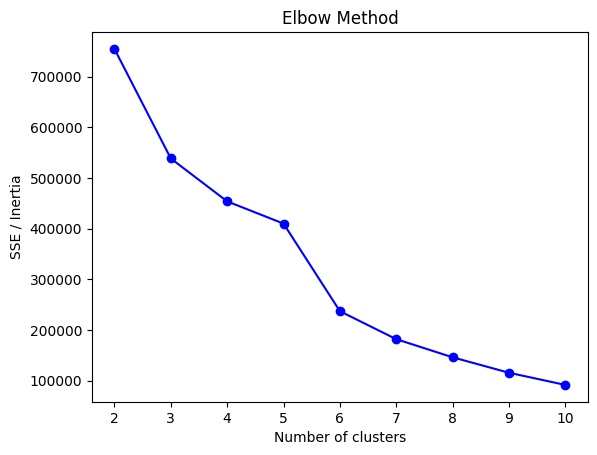

In [ ]:
# evaluation k-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(K, sse, 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("SSE / Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

k = 4  # chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)
